# Cost Function for Logistic Regression

## 1. Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:

$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\text{ (Sigmoid function)}\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\text{ (Decision boundary)}\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
def compute_cost_logistic(X, y, w, b):
    
    m =  X.shape[0]    
    
    z = np.dot(X, w) + b
    
    f_w_b = sigmoid(z)
    
    total_loss = - np.dot(y, np.log(f_w_b)) - np.dot(1 - y, np.log(1 - f_w_b))
    
    cost = total_loss / m
        
    return cost

def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    
    return g

`%matplotlib widget` 是 Jupyter Notebook 中的一个魔法命令，用于在 notebook 中启用交互式的图形显示。当你使用这个命令后，matplotlib 将使用 "widget" 渲染器，这使得绘制的图表变得交互性，你可以通过鼠标进行缩放、平移等操作。

## 2.  Dataset

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  
print("X_train.shape:",X_train.shape)
y_train = np.array([0, 0, 0, 1, 1, 1])  
print("y_train.shape:",y_train.shape)

X_train.shape: (6, 2)
y_train.shape: (6,)


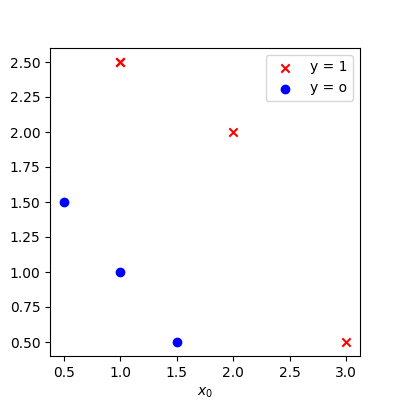

In [4]:
fig, ax = plt.subplots(1,1,figsize = (4,4))

i = y_train.shape[0]

while i >= 0:
    
    if y_train[i - 1] == 1:
        
        ax.scatter(X_train[i - 1, 0],X_train[i - 1, 1], marker = 'x', c = 'red')
        
    else:
        
        ax.scatter(X_train[i - 1, 0],X_train[i - 1, 1], marker = 'o', c = 'blue')
    
    i = i - 1

ax.scatter([], [], marker='x', c='red', label='y = 1')
ax.scatter([], [], marker='o', c='blue', label='y = o')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('')
plt.legend()
plt.show()

In [5]:
w_tmp = np.array([1,1])
b_tmp = -3
cost_logistic = compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)
print("cost_logistic:", cost_logistic)

cost_logistic: 0.36686678640551745


## 2. ferent decision boundary effect

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

In [6]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

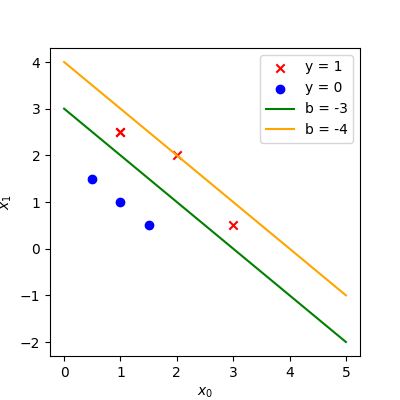

In [7]:
fig, ax = plt.subplots(1,1,figsize = (4,4))

i = y_train.shape[0]

while i >= 0:
    
    if y_train[i - 1] == 1:
        
        ax.scatter(X_train[i - 1, 0],X_train[i - 1, 1], marker = 'x', c = 'red')
        
    else:
        
        ax.scatter(X_train[i - 1, 0],X_train[i - 1, 1], marker = 'o', c = 'blue')
    
    i = i - 1

ax.scatter([], [], marker='x', c='red', label='y = 1')
ax.scatter([], [], marker='o', c='blue', label='y = 0')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('')
ax.plot(x0, x1, color = 'green', label = 'b = -3')
ax.plot(x0, x1_other, color = 'orange', label = 'b = -4')
plt.legend()
plt.show()

In [8]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


Green decision boundary is better than orange one! The green one can split them as 1 or 0 better!